# Using neural networks on MNIST Data 

In [ ]:
import pandas as pd
import numpy as np
import keras
from tensorflow.keras.utils import to_categorical
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

## Reading the data

In [ ]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [ ]:
y_train[0]

5

## Visualizing images from our data

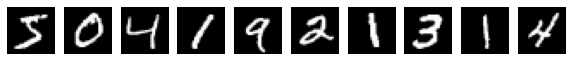

label for each of the above image: [5 0 4 1 9 2 1 3 1 4]


In [ ]:
# visualizing the first 10 images in the dataset and their labels
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_train[i], cmap="gray")
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_train[0:10]))

## Normalizing our train and test data

In [ ]:
# Flatten the images
image_vector_size = 28*28
x_train = x_train.reshape(x_train.shape[0], image_vector_size)
x_test = x_test.reshape(x_test.shape[0], image_vector_size)

# # normalize inputs from 0-255 to 0-1
x_train = x_train / 255.0
x_test = x_test / 255.0

print('Training set', x_train.shape, y_train.shape)
print('Test set', x_test.shape, y_test.shape)

Training set (60000, 784) (60000,)
Test set (10000, 784) (10000,)


## OHE the target variables

In [ ]:
# Convert to "one-hot" vectors using the to_categorical function
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test_cat=to_categorical(y_test,num_classes)

In [ ]:
print("First 5 training lables as one-hot encoded vectors:\n", y_train[:5])

First 5 training lables as one-hot encoded vectors:
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


## Definfing the sequential Model

In [ ]:
# define model

from tensorflow.keras import losses
from tensorflow.keras import optimizers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

image_size=28*28

# create model
model = Sequential()  

model.add(Dense(256, activation='relu',kernel_initializer='he_uniform',input_shape=(image_size,))) ###Multiple Dense units with Relu activation
model.add(Dense(64, activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(64, activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))

model.add(Dense(num_classes, activation='softmax')) ### For multiclass classification Softmax is used 

In [ ]:
# Compile model
#RMS_prop=optimizers.RMSprop()   ## we can similarly use different optimizers like RMSprop, Adagrad and SGD 
adam = optimizers.Adam(lr=1e-3)
model.compile(loss=losses.categorical_crossentropy, optimizer=adam, metrics=['accuracy']) ### Loss function = Categorical cross entropy

In [ ]:
## Looking into our base model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 10)                330       
                                                                 
Total params: 223,978
Trainable params: 223,978
Non-trainable params: 0
_________________________________________________________________


In [ ]:
checkpoint = ModelCheckpoint("model_weights.h5",monitor='val_accuracy',
                            save_weights_only=True, mode='max',verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=2,min_lr=0.00001,model='auto')

callbacks = [checkpoint,reduce_lr]

In [ ]:
# Fit the model
history=model.fit(x_train, y_train, validation_split=0.2, epochs=10, batch_size=128, verbose=2,callbacks=callbacks)

Epoch 1/10

Epoch 00001: saving model to model_weights.h5
375/375 - 8s - loss: 0.3498 - accuracy: 0.8963 - val_loss: 0.1497 - val_accuracy: 0.9555 - lr: 0.0010 - 8s/epoch - 22ms/step
Epoch 2/10

Epoch 00002: saving model to model_weights.h5
375/375 - 3s - loss: 0.1249 - accuracy: 0.9626 - val_loss: 0.1211 - val_accuracy: 0.9635 - lr: 0.0010 - 3s/epoch - 9ms/step
Epoch 3/10

Epoch 00003: saving model to model_weights.h5
375/375 - 3s - loss: 0.0816 - accuracy: 0.9749 - val_loss: 0.1165 - val_accuracy: 0.9663 - lr: 0.0010 - 3s/epoch - 7ms/step
Epoch 4/10

Epoch 00004: saving model to model_weights.h5
375/375 - 3s - loss: 0.0593 - accuracy: 0.9823 - val_loss: 0.0974 - val_accuracy: 0.9720 - lr: 0.0010 - 3s/epoch - 8ms/step
Epoch 5/10

Epoch 00005: saving model to model_weights.h5
375/375 - 3s - loss: 0.0469 - accuracy: 0.9852 - val_loss: 0.0918 - val_accuracy: 0.9742 - lr: 0.0010 - 3s/epoch - 8ms/step
Epoch 6/10

Epoch 00006: saving model to model_weights.h5
375/375 - 2s - loss: 0.0335 - a

In [ ]:
# predicting the model on test data
y_pred=model.predict(x_test)


In [ ]:
y_pred[0]

array([7.1898910e-11, 2.2191518e-08, 9.7571281e-08, 1.8174127e-05,
       8.7224022e-10, 4.5747513e-11, 4.9407405e-12, 9.9997950e-01,
       2.9319580e-08, 2.2705951e-06], dtype=float32)

In [ ]:
# As our outputs are probabilities so we will try to get the output class from these probablities by getting the maximum value
y_pred_final=[]
for i in y_pred:
  y_pred_final.append(np.argmax(i))

In [ ]:
y_pred_final[0]


7

## Generating classification report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_final))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.97      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.98      0.98       892
           6       0.99      0.98      0.98       958
           7       0.99      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



## Confusion Matrix

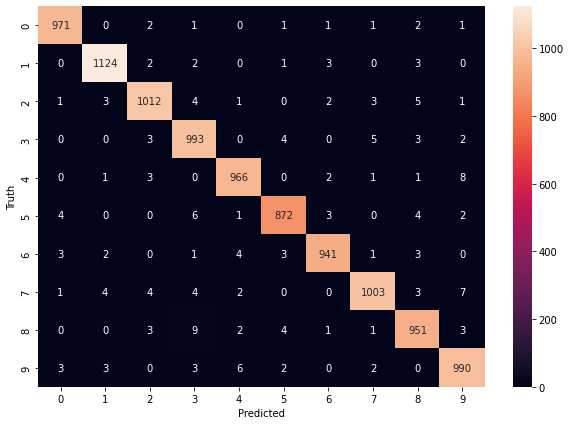

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm=confusion_matrix(y_test,y_pred_final)

plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

## Misclassified images

In [ ]:
index = 0
misclassified_images = []
for label, predict in zip(y_test, y_pred_final):
    if label != predict: 
        misclassified_images.append(index)
    index +=1
print(misclassified_images)
print(len(misclassified_images))

[247, 321, 340, 381, 445, 447, 495, 582, 619, 659, 684, 691, 720, 740, 900, 947, 951, 965, 1014, 1044, 1112, 1128, 1156, 1182, 1192, 1226, 1232, 1242, 1247, 1319, 1378, 1393, 1395, 1444, 1522, 1530, 1553, 1581, 1609, 1681, 1686, 1751, 1790, 1850, 1901, 1941, 1987, 2004, 2035, 2053, 2063, 2070, 2109, 2118, 2135, 2182, 2291, 2293, 2325, 2329, 2369, 2387, 2408, 2433, 2454, 2488, 2597, 2607, 2648, 2654, 2730, 2743, 2877, 2921, 2927, 2930, 2939, 2953, 3073, 3117, 3289, 3373, 3375, 3388, 3405, 3451, 3503, 3520, 3558, 3559, 3681, 3727, 3776, 3796, 3808, 3811, 3838, 3893, 3906, 3943, 4027, 4065, 4078, 4140, 4163, 4176, 4199, 4224, 4248, 4289, 4294, 4500, 4536, 4551, 4571, 4731, 4740, 4751, 4807, 4823, 4861, 4880, 5331, 5457, 5600, 5642, 5676, 5734, 5887, 5936, 5937, 5955, 5973, 6024, 6045, 6421, 6555, 6560, 6572, 6574, 6576, 6597, 6651, 6755, 6783, 6847, 6926, 7208, 7216, 7259, 7434, 7451, 7921, 8059, 8094, 8128, 8246, 8325, 8522, 8527, 9009, 9015, 9024, 9280, 9587, 9634, 9664, 9679, 9698, 972

## Predicting the output

Was predicted  0
Was labeled  6
Predicted Probabilities:  [[8.4977341e-01 4.3730297e-06 5.1355346e-07 7.6809030e-08 1.0476650e-06
  3.5130593e-05 1.4423952e-01 5.9298570e-03 1.4800710e-05 1.3183655e-06]]


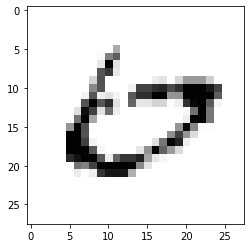

In [ ]:
image_index = 445
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(-1, 784))
print("Was predicted ",pred.argmax())
print("Was labeled ",y_test[image_index])
print("Predicted Probabilities: ",pred)

## Accuracy curve

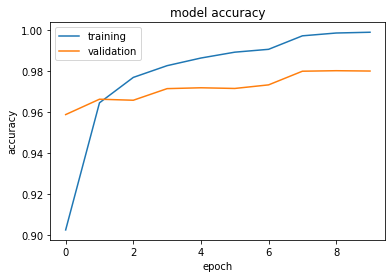

In [ ]:
loss, accuracy  = model.evaluate(x_test, y_test_cat, verbose=False)
    
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

#### Happy Learning